# Elevated-Plus Maze Analysis

In [1]:
from analysis import analysis_utils as au
from analysis import resampling as rs
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from scipy import stats
import seaborn as sns
import SigProc
import sys

In [2]:
%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"

In [3]:
sns.set_style("darkgrid")

In [4]:
mouse_directory = os.path.expanduser("~") + "/Hen_Lab/Mice/EPM"

if not os.path.exists(mouse_directory):
    print("The mouse directory does not exist", file=sys.stderr)

file_num = 0
raw_files = list()
for dir_name, subdir_list, file_list in os.walk(mouse_directory):
    for file_name in file_list:
        if file_name.endswith(".csv"):
            print("{}. full path of: {} is: {}".format(file_num, file_name, dir_name+"/"+file_name))
            file_num += 1
            raw_files.append(dir_name+"/"+file_name)

0. full path of: behavior_drd87.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd87/behavior_drd87.csv
1. full path of: Raw_EPM_drd87.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd87/Raw_EPM_drd87.csv
2. full path of: Raw_EPM_drd73.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd73/Raw_EPM_drd73.csv
3. full path of: behavior_drd73.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd73/behavior_drd73.csv
4. full path of: Raw_EPM_drd77.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd77/Raw_EPM_drd77.csv
5. full path of: behavior_drd77.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd77/behavior_drd77.csv
6. full path of: behavior_drd46.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd46/behavior_drd46.csv
7. full path of: Raw_EPM_drd46.csv is: /Users/saveliyyusufov/Hen_Lab/Mice/EPM/drd46/Raw_EPM_drd46.csv


In [5]:
data = pd.read_csv(raw_files[1], header=None)
_, AUC_dataframe, cell_transients_dataframe = SigProc.detect_ca_transients_mossy(data, 2, 0.5, 0.2, 10)

In [6]:
behavior_column_names = ['Trial_time', 'Recording_time', 'X_center', 'Y_center', 'Area', 'Areachange', 
                         'Elongation', 'Distance_moved', 'Velocity', 'Arena_centerpoint',
                         'Open1_centerpoint', 'Open2_centerpoint',
                         'Closed1_centerpoint', 'Closed2_centerpoint',
                         'OpenArms_centerpoint', 'ClosedArms_centerpoint', 'Result_1']

behavior_df = pd.read_csv(raw_files[0], header=None)
behavior_df.columns = behavior_column_names
behavior_df = au.downsample_dataframe(behavior_df, 3)

# Define what constitutes as a running frame
VELOCITY_CUTOFF = 4;

# Adds "Running_frames" column to the end of the behavior Dataframe 
behavior_df["Running_frames"] = np.where(behavior_df["Velocity"] > VELOCITY_CUTOFF, 1, 0)

In [7]:
neuron_concated_behavior = AUC_dataframe.join(behavior_df, how="left")

In [8]:
real_diff_of_means_df = au.set_real_diff_df(neuron_concated_behavior, AUC_dataframe, "OpenArms_centerpoint", "ClosedArms_centerpoint")
real_diff_of_means_df

,neuron1,neuron2,neuron3,neuron4,neuron5,neuron6,neuron7,neuron8,neuron9,neuron10,...,neuron60,neuron61,neuron62,neuron63,neuron64,neuron65,neuron66,neuron67,neuron68,neuron69
d,-4.19561,6.9537,5.86234,12.2911,7.6943,-1.0277,1.02405,-0.860894,-3.20938,2.44695,...,9.97405,-1.6101,6.50104,0.434317,5.00547,9.15386,5.86696,0.973809,-1.97104,13.037


In [9]:
resampled_df = rs.shuffle(20000, neuron_concated_behavior, AUC_dataframe, "OpenArms_centerpoint", "ClosedArms_centerpoint")

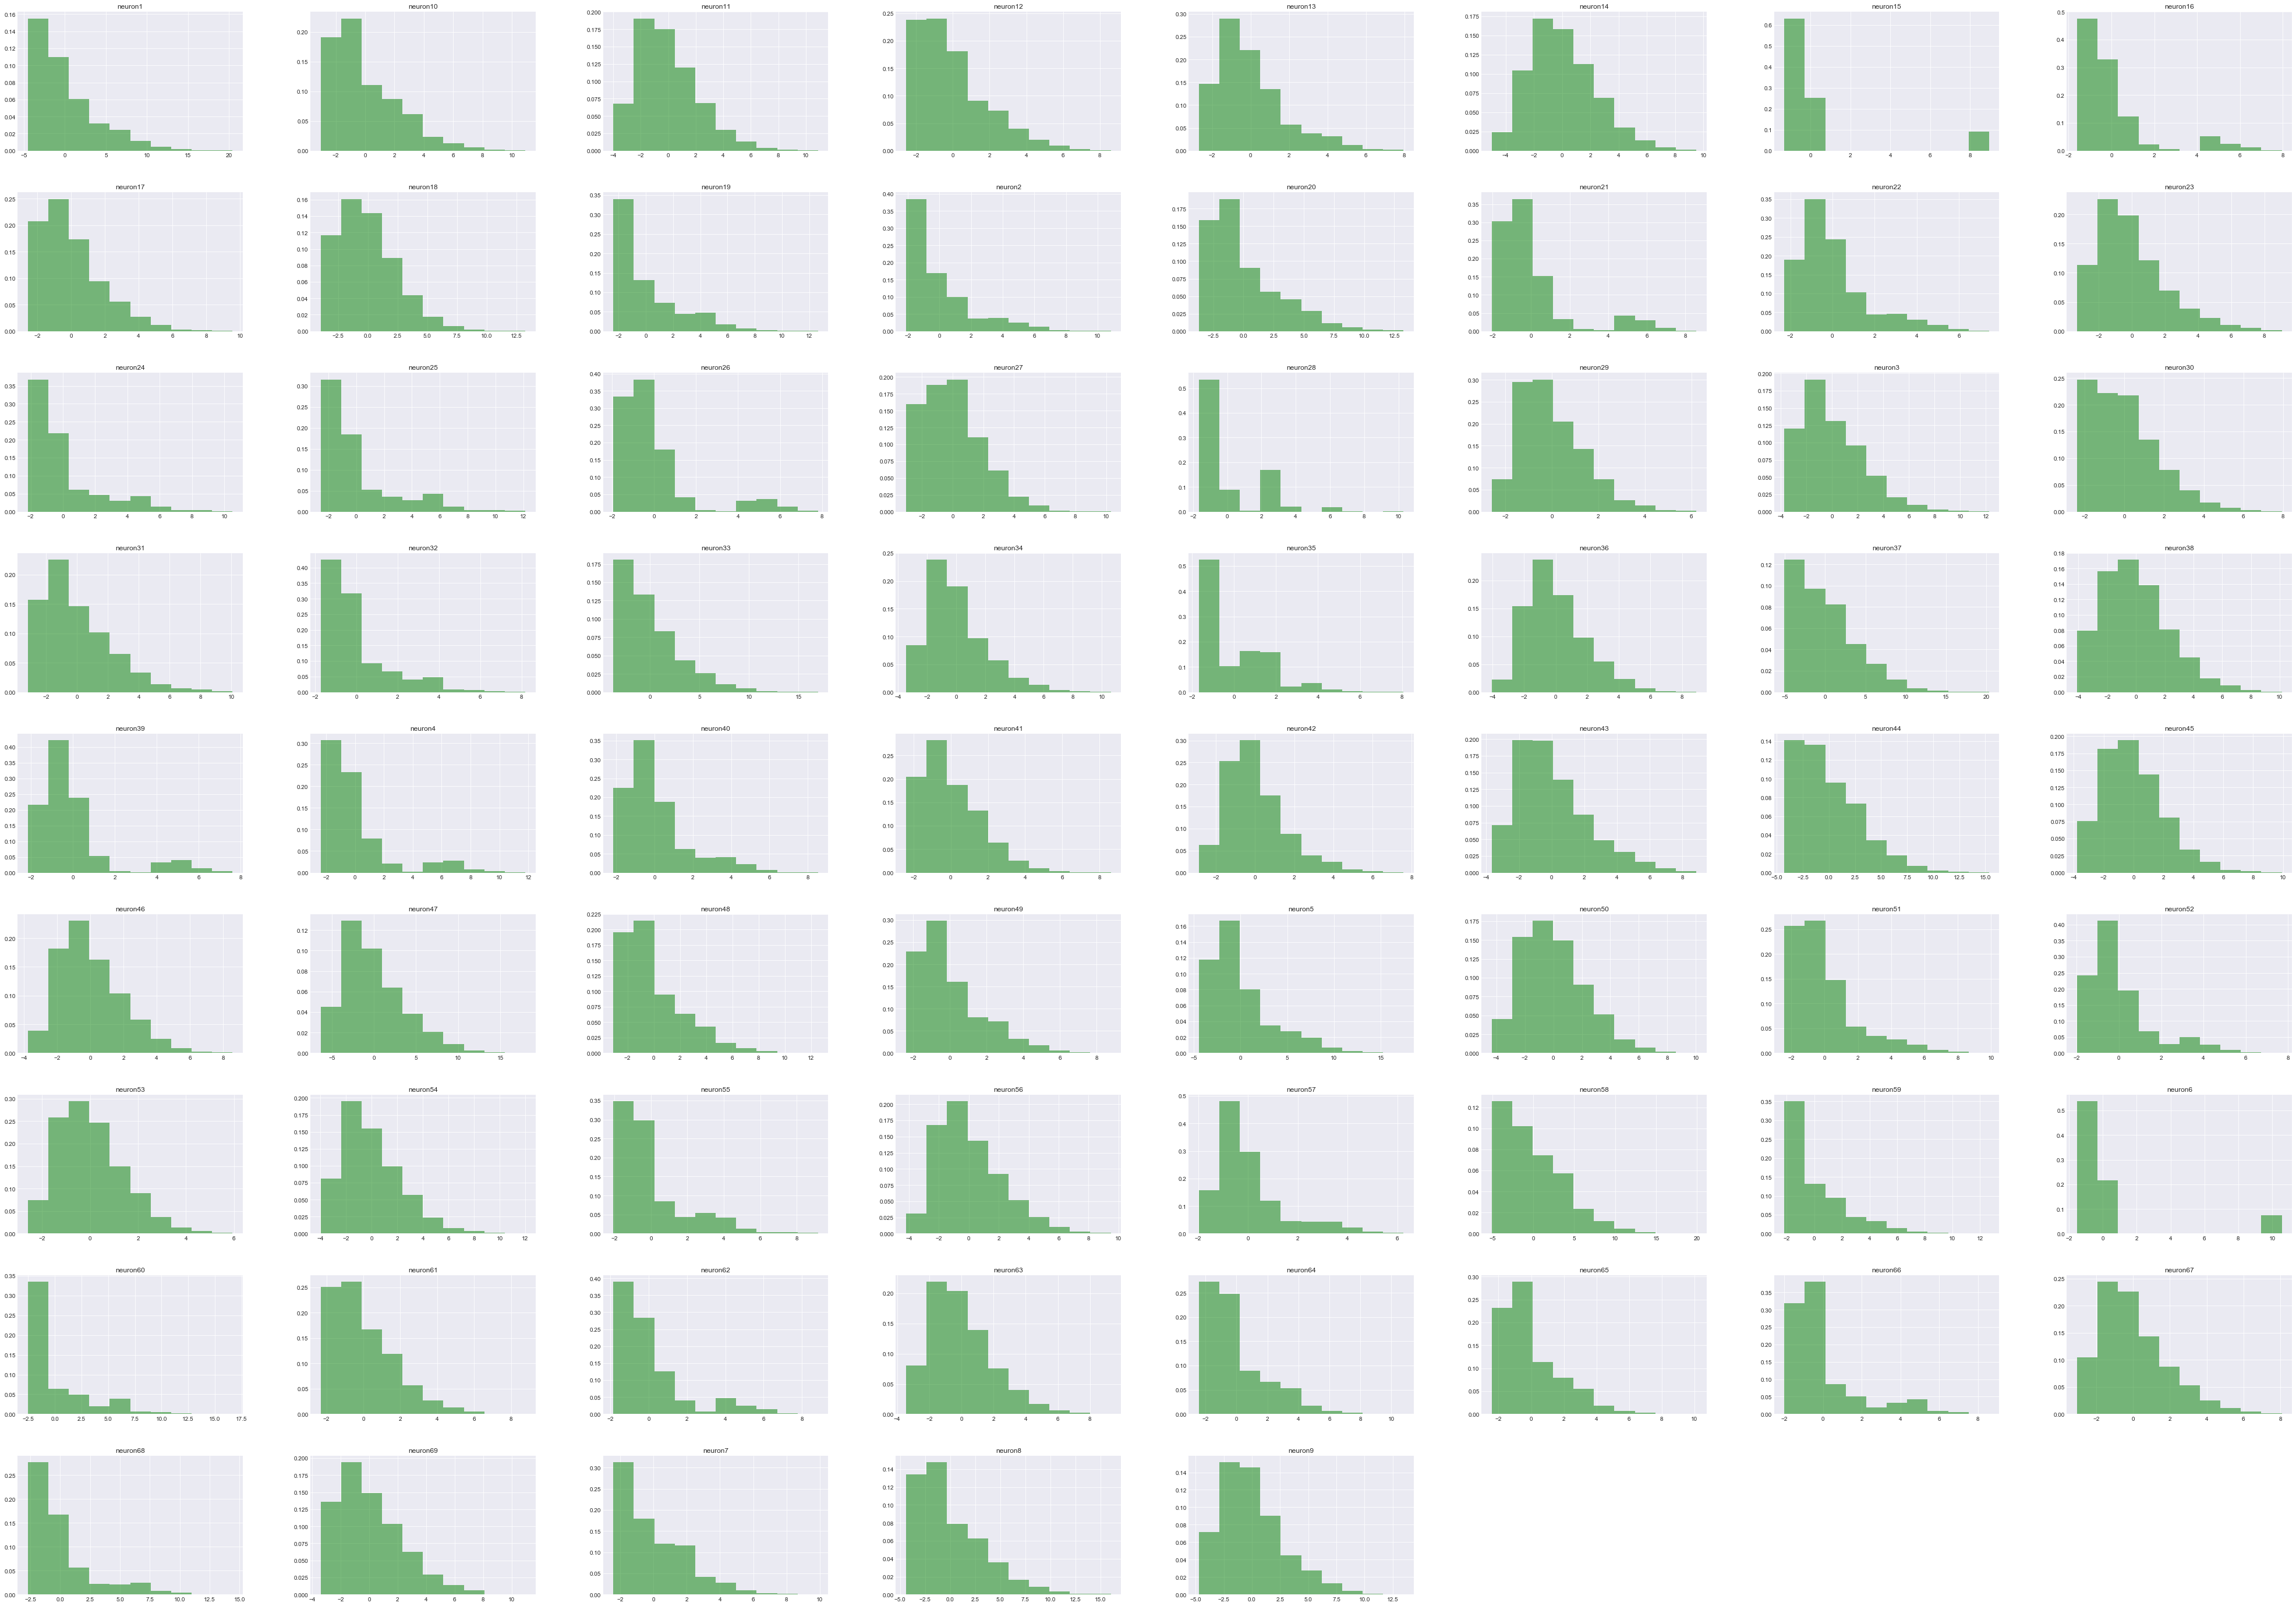

In [10]:
resampled_df.hist(alpha=0.5, color='g', density=True, figsize=(70, 50));

In [11]:
classified_neurons = rs.non_normal_neuron_classifier(AUC_dataframe, resampled_df, real_diff_of_means_df, p_value=0.125, threshold=10)

In [12]:
deeper_classification = classified_neurons.copy()

for neuron in deeper_classification:
    if real_diff_of_means_df[neuron].values > 0:
        if deeper_classification[neuron] == "selective":
            deeper_classification[neuron] = "OpenArms_centerpoint"
    elif real_diff_of_means_df[neuron].values < 0:
        if deeper_classification[neuron] == "selective":
            deeper_classification[neuron] = "ClosedArms_centerpoint"

In [13]:
deeper_classification

{'neuron6': 'unclassified',
 'neuron15': 'unclassified',
 'neuron19': 'unclassified',
 'neuron28': 'unclassified',
 'neuron59': 'unclassified',
 'neuron60': 'unclassified',
 'neuron1': 'not-selective',
 'neuron2': 'OpenArms_centerpoint',
 'neuron3': 'OpenArms_centerpoint',
 'neuron4': 'OpenArms_centerpoint',
 'neuron5': 'OpenArms_centerpoint',
 'neuron7': 'not-selective',
 'neuron8': 'not-selective',
 'neuron9': 'not-selective',
 'neuron10': 'not-selective',
 'neuron11': 'ClosedArms_centerpoint',
 'neuron12': 'not-selective',
 'neuron13': 'OpenArms_centerpoint',
 'neuron14': 'not-selective',
 'neuron16': 'OpenArms_centerpoint',
 'neuron17': 'OpenArms_centerpoint',
 'neuron18': 'ClosedArms_centerpoint',
 'neuron20': 'not-selective',
 'neuron21': 'not-selective',
 'neuron22': 'OpenArms_centerpoint',
 'neuron23': 'not-selective',
 'neuron24': 'not-selective',
 'neuron25': 'OpenArms_centerpoint',
 'neuron26': 'OpenArms_centerpoint',
 'neuron27': 'OpenArms_centerpoint',
 'neuron29': 'OpenAr

In [14]:
import plotly
import plotly.graph_objs as go

def plot_pie_chart(dict_of_classifications, *labels):
    values = [sum([1 for classification in dict_of_classifications.values() if classification == "OpenArms_centerpoint"])]
    values.append(sum([1 for classification in dict_of_classifications.values() if classification == "ClosedArms_centerpoint"]))
    values.append(sum([1 for classification in dict_of_classifications.values() if classification == "not-selective"]))
    values.append(sum([1 for classification in dict_of_classifications.values() if classification == "unclassified"]))
    
    trace = go.Pie(labels=labels, values=values)
    plotly.offline.iplot([trace])

In [15]:
plot_pie_chart(deeper_classification, "OpenArms_centerpoint", "ClosedArms_centerpoint", "not-selective", "unclassified")

In [16]:
normal_classification = rs.normal_neuron_classifier(AUC_dataframe, resampled_df, real_diff_of_means_df, behavior1_name="OpenArms_centerpoint", behavior2_name="ClosedArms_centerpoint", high_tail=87.5, low_tail=5, threshold=10)

In [17]:
normal_classification

{'neuron6': 'unclassified',
 'neuron15': 'unclassified',
 'neuron19': 'unclassified',
 'neuron28': 'unclassified',
 'neuron59': 'unclassified',
 'neuron60': 'unclassified',
 'neuron1': 'ClosedArms_centerpoint',
 'neuron2': 'OpenArms_centerpoint',
 'neuron3': 'OpenArms_centerpoint',
 'neuron4': 'OpenArms_centerpoint',
 'neuron5': 'OpenArms_centerpoint',
 'neuron7': 'not-selective',
 'neuron8': 'not-selective',
 'neuron9': 'not-selective',
 'neuron10': 'not-selective',
 'neuron11': 'ClosedArms_centerpoint',
 'neuron12': 'not-selective',
 'neuron13': 'OpenArms_centerpoint',
 'neuron14': 'not-selective',
 'neuron16': 'OpenArms_centerpoint',
 'neuron17': 'OpenArms_centerpoint',
 'neuron18': 'ClosedArms_centerpoint',
 'neuron20': 'not-selective',
 'neuron21': 'not-selective',
 'neuron22': 'OpenArms_centerpoint',
 'neuron23': 'not-selective',
 'neuron24': 'not-selective',
 'neuron25': 'OpenArms_centerpoint',
 'neuron26': 'OpenArms_centerpoint',
 'neuron27': 'OpenArms_centerpoint',
 'neuron29'

In [18]:
plot_pie_chart(normal_classification, "OpenArms_centerpoint", "ClosedArms_centerpoint", "not-selective", "unclassified")

# Plot scatterplot of neurons, where $x$-axis is the closedarms rate, $y$-axis is the openarms rate, and the entire scatterplot is bisected by the line $y=x$

In [19]:
def activity_by_neurons(concated_df, neuron_names, *behaviors, frame_rate=10):
    """Computes the neuron activity rates for given behaviors
    
    This function computes the rates for a given animal's activity and  
    neuron, given some set of behaviors.

    Args: 
        concated_df: a concatenated pandas DataFrame of the neuron activity and 
        the corresponding behavior, for a given animal.
        neuron_names: the names of the neurons whose rates are to be computed.
        behaviors: a list of the behaviors for which to compute the activity rates. 
        frame_rate: the framerate to multiply the rate by, default is 10.

    Returns: 
        activity_df: a pandas DataFrame of the neuron activity rates.
    """
    activity_df = pd.DataFrame(columns=behaviors)
    
    for behavior in behaviors:
        if behavior in concated_df.columns:
            activity_df.loc[:, behavior] = frame_rate * concated_df.loc[concated_df[behavior] != 0, neuron_names].mean()
        elif '&' in behavior:
            beh1 = behavior.split('&')[0]
            beh2 = behavior.split('&')[1]
            activity_df.loc[:, behavior] = frame_rate * concated_df.loc[(concated_df[beh1] != 0) & ((concated_df[beh2] != 0)), neuron_names].mean()
        elif '|' in behavior:
            beh1 = behavior.split('|')[0]
            beh2 = behavior.split('|')[1]
            activity_df.loc[:, behavior] = frame_rate * concated_df.loc[(concated_df[beh1] != 0) | ((concated_df[beh2] != 0)), neuron_names].mean()

    return activity_df

In [20]:
# activity_rates_df = activity_by_neurons(neuron_concated_behavior, AUC_dataframe.columns, "ClosedArms_centerpoint", "OpenArms_centerpoint", "OpenArms_centerpoint&Running_frames", "ClosedArms_centerpoint&Running_frames", "Running_frames")
activity_rates_df = activity_by_neurons(neuron_concated_behavior, AUC_dataframe.columns, "ClosedArms_centerpoint", "OpenArms_centerpoint")

In [21]:
for neuron in classified_neurons:
    if deeper_classification[neuron] == "OpenArms_centerpoint":
        print(neuron)

neuron2
neuron3
neuron4
neuron5
neuron13
neuron16
neuron17
neuron22
neuron25
neuron26
neuron27
neuron29
neuron31
neuron32
neuron34
neuron47
neuron49
neuron50
neuron54
neuron55
neuron57
neuron62
neuron64
neuron65
neuron66
neuron69


In [22]:
# Create traces

# Plot selective neurons
trace0 = go.Scatter(
    x = [activity_rates_df.loc[neuron, "OpenArms_centerpoint"] for neuron in deeper_classification if deeper_classification[neuron] == "OpenArms_centerpoint"],
    y = [activity_rates_df.loc[neuron, "ClosedArms_centerpoint"] for neuron in deeper_classification if deeper_classification[neuron] == "ClosedArms_centerpoint"],
    text = [neuron for neuron in deeper_classification if deeper_classification[neuron] == "OpenArms_centerpoint"],
    mode = "markers",
    name = "selective",
    marker = dict(
        color = 'rgb(255, 10, 193)'
    )
)

# Plot not-selective neurons
trace1 = go.Scatter(
    x = [activity_rates_df.loc[neuron, "OpenArms_centerpoint"] for neuron in deeper_classification if deeper_classification[neuron] == "not-selective"],
    y = [activity_rates_df.loc[neuron, "ClosedArms_centerpoint"] for neuron in deeper_classification if deeper_classification[neuron] == "not-selective"],
    text = [neuron for neuron in deeper_classification if deeper_classification[neuron] == "not-selective"],
    mode = "markers",
    name = "not-selective",
    marker = dict(
        color = 'rgb(105, 105, 105)'
    )
)

# Plot unclassified neurons
trace2 = go.Scatter(
    x = [activity_rates_df.loc[neuron, "OpenArms_centerpoint"] for neuron in deeper_classification if deeper_classification[neuron] == "unclassified"],
    y = [activity_rates_df.loc[neuron, "ClosedArms_centerpoint"] for neuron in deeper_classification if deeper_classification[neuron] == "unclassified"],
    text = [neuron for neuron in classified_neurons if deeper_classification[neuron] == "unclassified"],
    mode = "markers",
    name = "unclassified",
    marker = dict(
        color = "rgb(255, 69, 0)"
    )
)

# Plot y=x line
trace3 = go.Scatter(
    x = np.linspace(0, max(activity_rates_df["OpenArms_centerpoint"].max(), activity_rates_df["ClosedArms_centerpoint"].max())),
    y = np.linspace(0, max(activity_rates_df["OpenArms_centerpoint"].max(), activity_rates_df["ClosedArms_centerpoint"].max())),
    mode = 'lines',
    name = 'y=x'
)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    width=800,
    height=800,
    title="Open-arms neuron rates vs Closed-arms neuron rates",
)
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)